In [8]:
# read the LGMR_SAT_climo.nc under LGMR_data

import xarray as xr


ds_sat = xr.open_dataset('LGMR_data/LGMR_SAT_climo.nc')
ds_sat.info()

xarray.Dataset {
dimensions:
	lat = 96 ;
	lon = 144 ;
	age = 120 ;

variables:
	float32 lat(lat) ;
		lat:FillValue = 9.969209968386869e+36 ;
		lat:long_name = vector latitudes ;
		lat:units = degrees_north ;
	float32 lon(lon) ;
		lon:FillValue = 9.969209968386869e+36 ;
		lon:long_name = vector of longitudes ;
		lon:units = degrees_east ;
	float32 age(age) ;
		age:long_name = reconstruction bin mid-point (years BP) ;
	float32 sat(age, lat, lon) ;
		sat:FillValue = 9.969209968386869e+36 ;
		sat:long_name = ENSEMBLE MEAN (n = 500) mean annual temperature at reference height ;
		sat:units = degrees Celsius ;
	float32 sat_std(age, lat, lon) ;
		sat_std:FillValue = 9.969209968386869e+36 ;
		sat_std:long_name = ENSEMBLE STANDARD DEVIATION (n = 500) mean annual temperature at reference height ;
		sat_std:units = degrees Celsius ;

// global attributes:
}

In [13]:
ds_sat_flipped = ds_sat.reindex(age=ds_sat.age[::-1])
# age*-1+23900
ds_sat_flipped['age'] = ds_sat_flipped.age.values*-1+24000
ds_sat_flipped

# save data to LGMR_data/
import xarray as xr
ds_sat_flipped.to_netcdf('LGMR_data/ds_sat_flipped.nc')

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [11]:
ds_sat_flipped['sat'][:,20,30].values

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


array([-0.8413619 , -0.9970293 , -1.0682147 , -0.9069225 , -0.8609382 ,
       -0.9463749 , -1.2005372 , -1.5741385 , -1.6518022 , -1.9593968 ,
       -1.7545806 , -1.882332  , -1.9091483 , -1.9523247 , -2.4009607 ,
       -2.2520168 , -2.196     , -1.8777024 , -1.7970855 , -1.6025378 ,
       -1.172887  , -0.69478804, -0.5137926 , -0.46076852, -0.19187267,
       -0.39171872, -0.06959877,  0.2604107 ,  0.52220744,  0.36397004,
        0.3194587 ,  0.61335045,  1.1757534 ,  1.208923  ,  1.424625  ,
        1.6227375 ,  1.9930279 ,  2.803318  ,  2.882623  ,  2.9316354 ,
        3.2107456 ,  3.202803  ,  3.2853372 ,  3.2846253 ,  3.3786333 ,
        3.51195   ,  3.40251   ,  3.180092  ,  3.1732342 ,  3.3736627 ,
        3.742385  ,  3.9236038 ,  3.7679553 ,  3.8203773 ,  3.9292855 ,
        3.8230488 ,  3.613958  ,  3.492168  ,  3.8172634 ,  4.121722  ,
        4.0024123 ,  4.2702484 ,  4.698402  ,  4.8181686 ,  4.9120984 ,
        4.8923106 ,  4.847909  ,  4.792205  ,  4.358775  ,  4.15

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


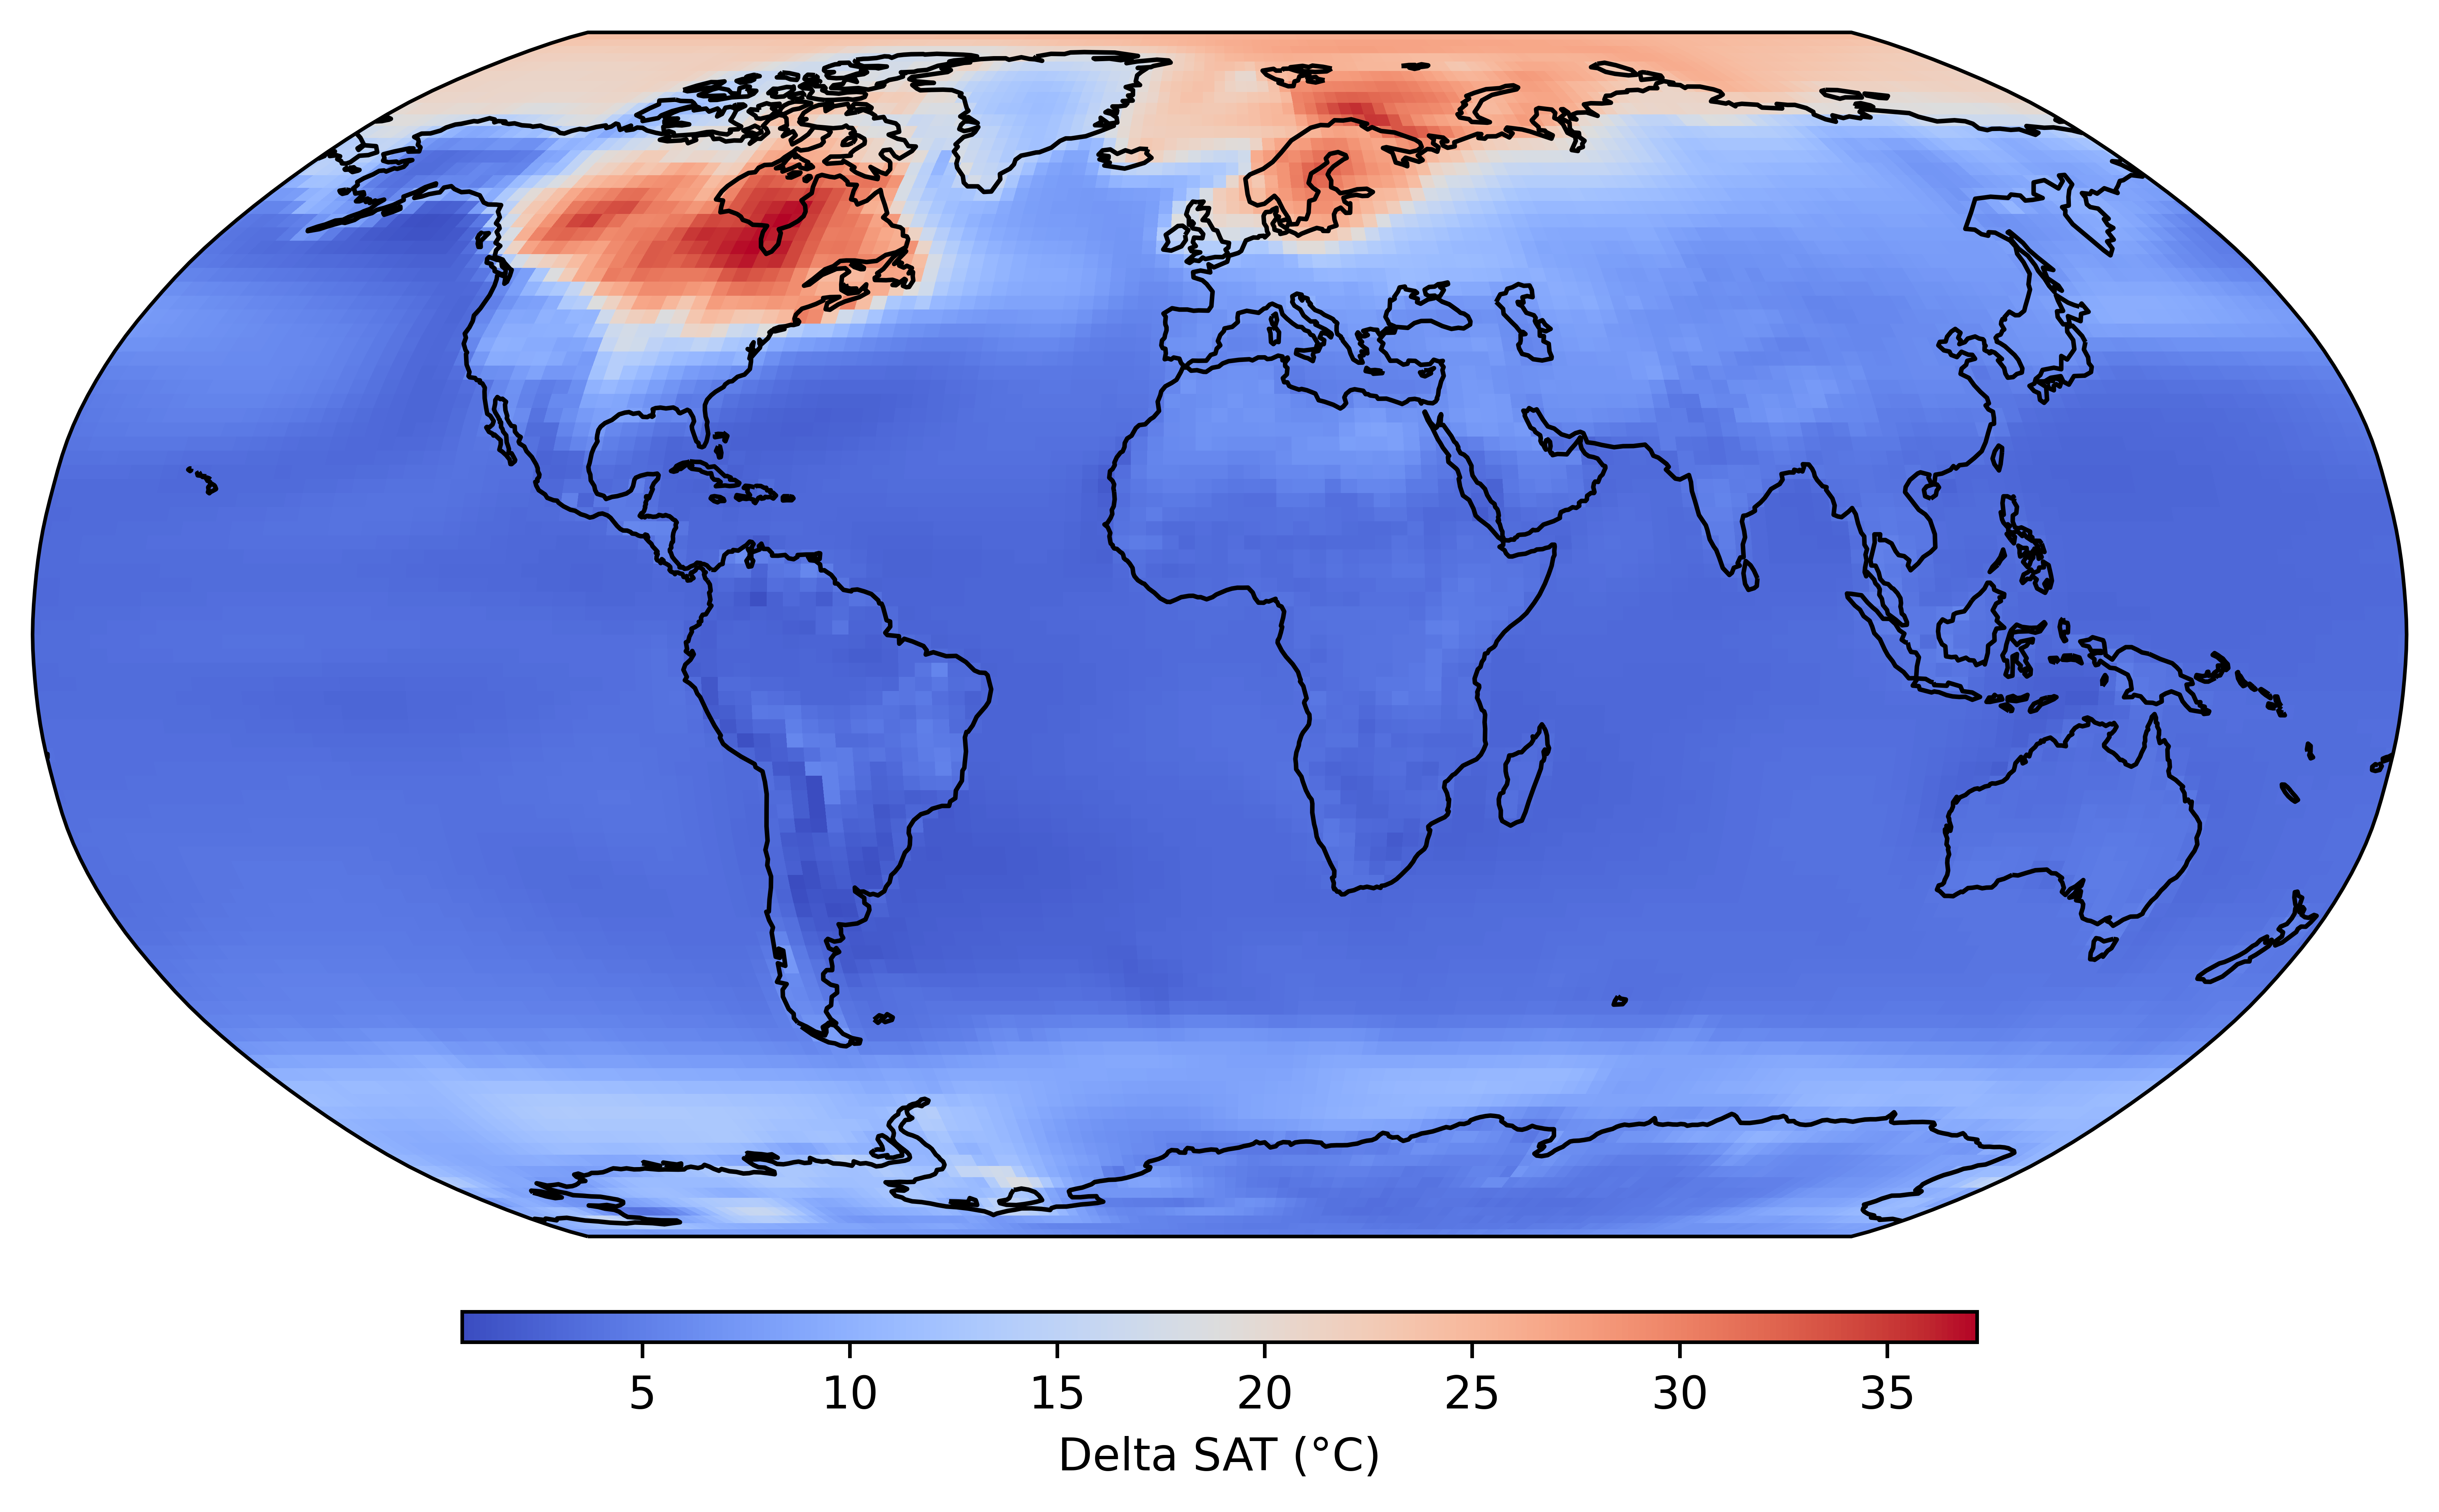

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# Calculate the difference in SAT between the first and last age values
sat_diff =  ds_sat_flipped['sat'].sel(age=23000,method='nearest')-ds_sat_flipped['sat'].sel(age=100,method='nearest') 
# sat_diff = ds_sat['sat'].isel(0) - ds_sat['sat'].isel(-1)

# Plotting
fig = plt.figure(figsize=(12, 6),dpi=900)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()

# Plot the difference
sat_diff_plot = ax.pcolormesh(ds_sat_flipped['lon'], ds_sat_flipped['lat'], sat_diff, transform=ccrs.PlateCarree(), cmap='coolwarm')

# Add a colorbar
cbar = plt.colorbar(sat_diff_plot, orientation='horizontal', pad=0.05, aspect=50, shrink=0.5)
cbar.set_label('Delta SAT (°C)')

# plt.title('LGMR SAT Differences between 22000 and 1000 yr BP')
plt.show()


# LGMR ensemble data

In [31]:
import xarray as xr

ds_sat_ens= xr.open_dataset('LGMR_data/LGMR_SAT_ens.nc')
ds_sat_ens

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120, nEns: 500)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
  * nEns     (nEns) float32 1.0 2.0 3.0 4.0 5.0 ... 497.0 498.0 499.0 500.0
Data variables:
    sat      (nEns, age, lat, lon) float32 ...

In [36]:
ds_sat_ens_flipped = ds_sat_ens.reindex(age=ds_sat_ens.age[::-1])
# ds_sat_ens_flipped=ds_sat_ens

ds_sat_ens_flipped['age'] = ds_sat_ens_flipped.age.values*-1+24000
ds_sat_ens_flipped

# # save data to LGMR_data/
import xarray as xr
ds_sat_ens_flipped.to_netcdf('LGMR_data/ds_sat_ens_flipped.nc')

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [33]:
ds_sat_ens_flipped['age'].values

array([23900., 23700., 23500., 23300., 23100., 22900., 22700., 22500.,
       22300., 22100., 21900., 21700., 21500., 21300., 21100., 20900.,
       20700., 20500., 20300., 20100., 19900., 19700., 19500., 19300.,
       19100., 18900., 18700., 18500., 18300., 18100., 17900., 17700.,
       17500., 17300., 17100., 16900., 16700., 16500., 16300., 16100.,
       15900., 15700., 15500., 15300., 15100., 14900., 14700., 14500.,
       14300., 14100., 13900., 13700., 13500., 13300., 13100., 12900.,
       12700., 12500., 12300., 12100., 11900., 11700., 11500., 11300.,
       11100., 10900., 10700., 10500., 10300., 10100.,  9900.,  9700.,
        9500.,  9300.,  9100.,  8900.,  8700.,  8500.,  8300.,  8100.,
        7900.,  7700.,  7500.,  7300.,  7100.,  6900.,  6700.,  6500.,
        6300.,  6100.,  5900.,  5700.,  5500.,  5300.,  5100.,  4900.,
        4700.,  4500.,  4300.,  4100.,  3900.,  3700.,  3500.,  3300.,
        3100.,  2900.,  2700.,  2500.,  2300.,  2100.,  1900.,  1700.,
      

In [34]:

ds_sat_ens_flipped['sat'][0,:,20,30].values

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


array([-1.9750732 , -2.3739076 , -2.5170045 , -0.9163574 ,  1.7718445 ,
       -1.5014099 , -0.81107175, -2.813971  , -2.139319  , -1.3007568 ,
       -4.1211    , -1.3302368 , -3.9260316 , -0.2336792 , -1.3231262 ,
        0.28460082, -2.4861207 , -2.778296  , -5.886725  , -3.3809876 ,
       -2.2342286 , -1.2260498 , -3.373999  , -1.0173706 , -0.9238342 ,
       -0.5559753 , -3.6050172 ,  0.36983642,  0.05727539, -1.5330871 ,
       -0.900885  ,  0.01769409, -1.661261  , -2.6409364 ,  1.1942993 ,
        0.74172366,  2.6404662 , -1.0482239 ,  5.650995  ,  1.9024597 ,
        0.8093811 , -0.17038575,  1.5871216 ,  3.146051  ,  4.05697   ,
        3.9689574 ,  2.0078979 ,  4.1000915 ,  2.9565673 ,  6.3164    ,
        4.575586  ,  3.9269347 ,  4.453302  ,  2.2814574 ,  3.1997008 ,
        7.2097106 ,  3.376947  ,  3.9611144 ,  5.322534  ,  4.784906  ,
        3.4368224 ,  4.169519  ,  7.4279113 ,  6.1090636 ,  5.455835  ,
        5.712335  ,  5.1154113 ,  5.9675536 ,  6.0215087 ,  4.05

# Precession and obliquity data

In [39]:
import pandas as pd

# Read the file into a DataFrame
df_pre = pd.read_csv(
    r"D:\VScode\Inso_LGMR\inso_data\pre.txt", 
    sep='\s+',       # '\s+' means "split on any whitespace"
    header=None,     # or specify a row number if there's a header
    engine='python'
)


df_pre.iloc[:, 0] = df_pre.iloc[:, 0].abs() * 1000

# # Reverse the DataFrame rows
# df_pre = df_pre.iloc[::-1]

# Rename the columns
df_pre.columns = ['age', 'pre']




df_obl = pd.read_csv(r"D:\VScode\Inso_LGMR\inso_data\obl.txt", 
                     sep='\s+', 
                     header=None, 
                     engine='python')

df_obl.iloc[:, 0] = df_obl.iloc[:, 0].abs() * 1000

# df_obl = df_obl.iloc[::-1]
df_obl.columns = ['age', 'obl']


# crop the data for age>=100 <=23900
df_pre = df_pre[(df_pre['age'] >= 100) & (df_pre['age'] <= 23900)]
df_obl = df_obl[(df_obl['age'] >= 100) & (df_obl['age'] <= 23900)]

# remove rows that can be divided by 200
df_pre = df_pre[df_pre['age'] % 200 != 0]
df_obl = df_obl[df_obl['age'] % 200 != 0]

# the age column * -1 +24000
df_pre['age'] = df_pre['age'] * -1 + 24000
df_obl['age'] = df_obl['age'] * -1 + 24000


df_obl
df_pre


,age,pre
261,100.0,0.016777
263,300.0,0.017182
265,500.0,0.017535
267,700.0,0.017836
269,900.0,0.018083
...,...,...
491,23100.0,0.017104
493,23300.0,0.017029
495,23500.0,0.016891
497,23700.0,0.016690


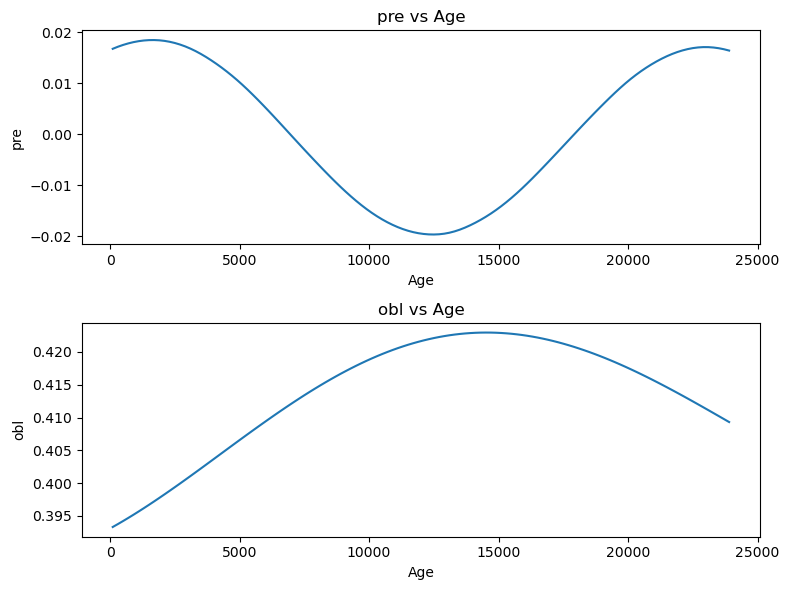

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# -- Plotting in a 2x1 figure --
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Upper subplot: pre
ax1.plot(df_pre['age'], df_pre['pre'])
ax1.set_title('pre vs Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('pre')

# Lower subplot: obl
ax2.plot(df_obl['age'], df_obl['obl'])
ax2.set_title('obl vs Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('obl')

plt.tight_layout()
plt.show()


In [41]:
# save df_pre and df_obl to csv files
df_pre.to_csv(r"D:\VScode\Inso_LGMR\inso_data\pre.csv", index=False)
df_obl.to_csv(r"D:\VScode\Inso_LGMR\inso_data\obl.csv", index=False)

In [45]:
# read the csv files
import pandas as pd
df_pre = pd.read_csv(r"D:\VScode\Inso_LGMR\inso_data\pre.csv")
df_obl = pd.read_csv(r"D:\VScode\Inso_LGMR\inso_data\obl.csv")
df_pre

,age,pre
0,100.0,0.016777
1,300.0,0.017182
2,500.0,0.017535
3,700.0,0.017836
4,900.0,0.018083
...,...,...
115,23100.0,0.017104
116,23300.0,0.017029
117,23500.0,0.016891
118,23700.0,0.016690
